<a href="https://colab.research.google.com/github/toanhac/mm231solver/blob/main/problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [ ]:
"""From Bradley, Hax and Maganti, 'Applied Mathematical Programming', figure 8.1."""
import numpy as np

from ortools.graph.python import min_cost_flow


def main():
    """MinCostFlow simple interface example."""
    # Instantiate a SimpleMinCostFlow solver.
    smcf = min_cost_flow.SimpleMinCostFlow()

    # Define four parallel arrays: sources, destinations, capacities,
    # and unit costs between each pair. For instance, the arc from node 0
    # to node 1 has a capacity of 15.
    start_nodes = np.array([0, 0, 1, 1, 1, 2, 2, 3, 4])
    end_nodes = np.array([1, 2, 2, 3, 4, 3, 4, 4, 2])
    capacities = np.array([15, 8, 20, 4, 10, 15, 4, 20, 5])
    unit_costs = np.array([4, 4, 2, 2, 6, 1, 3, 2, 3])

    # Define an array of supplies at each node.
    supplies = [20, 0, 0, -5, -15]

    # Add arcs, capacities and costs in bulk using numpy.
    all_arcs = smcf.add_arcs_with_capacity_and_unit_cost(
        start_nodes, end_nodes, capacities, unit_costs
    )

    # Add supply for each nodes.
    smcf.set_nodes_supplies(np.arange(0, len(supplies)), supplies)

    # Find the min cost flow.
    status = smcf.solve()

    if status != smcf.OPTIMAL:
        print("There was an issue with the min cost flow input.")
        print(f"Status: {status}")
        exit(1)
    print(f"Minimum cost: {smcf.optimal_cost()}")
    print("")
    print(" Arc    Flow / Capacity Cost")
    solution_flows = smcf.flows(all_arcs)
    costs = solution_flows * unit_costs
    for arc, flow, cost in zip(all_arcs, solution_flows, costs):
        print(
            f"{smcf.tail(arc):1} -> {smcf.head(arc)}  {flow:3}  / {smcf.capacity(arc):3}       {cost}"
        )


if __name__ == "__main__":
    main()

Minimum cost: 150

 Arc    Flow / Capacity Cost
0 -> 1   12  /  15       48
0 -> 2    8  /   8       32
1 -> 2    8  /  20       16
1 -> 3    4  /   4       8
1 -> 4    0  /  10       0
2 -> 3   12  /  15       12
2 -> 4    4  /   4       12
3 -> 4   11  /  20       22
4 -> 2    0  /   5       0


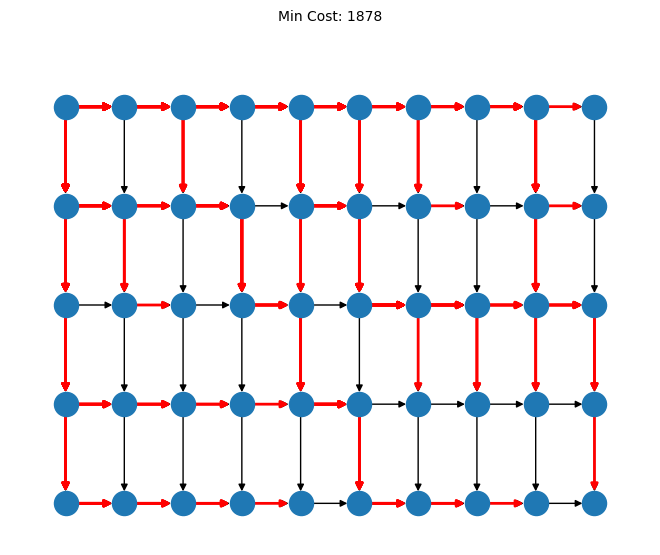

Flow: {(2, 3): 58, (2, 12): 0, (3, 4): 50, (3, 13): 6, (4, 5): 48, (4, 14): 0, (5, 6): 29, (5, 15): 17, (6, 7): 21, (6, 16): 6, (7, 8): 15, (7, 17): 4, (8, 9): 13, (8, 18): 0, (9, 10): 2, (9, 19): 9, (10, 20): 0, (11, 12): 14, (11, 21): 22, (12, 13): 8, (12, 22): 4, (13, 14): 12, (13, 23): 0, (14, 15): 0, (14, 24): 10, (15, 16): 11, (15, 25): 4, (16, 17): 0, (16, 26): 15, (17, 18): 2, (17, 27): 0, (18, 28): 0, (18, 19): 0, (19, 20): 2, (19, 29): 5, (20, 30): 0, (21, 31): 20, (21, 22): 0, (22, 23): 2, (22, 32): 0, (23, 24): 0, (23, 33): 0, (24, 25): 8, (24, 34): 0, (25, 26): 0, (25, 35): 10, (26, 27): 13, (26, 36): 0, (27, 28): 9, (27, 37): 2, (28, 29): 5, (28, 38): 2, (29, 30): 6, (29, 39): 2, (30, 40): 4, (31, 41): 10, (31, 32): 8, (32, 42): 0, (32, 33): 6, (33, 34): 4, (33, 43): 0, (34, 35): 2, (34, 44): 0, (35, 36): 10, (35, 45): 0, (36, 46): 8, (36, 37): 0, (37, 38): 0, (37, 47): 0, (38, 39): 0, (38, 48): 0, (39, 40): 0, (39, 49): 0, (40, 50): 2, (41, 42): 8, (42, 43): 6, (43, 44):

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def draw_graph_without_labels(G, paths=None, min_cost=None, flow=None):
    G.remove_node('dTarget')
    G.remove_node('dSource')
    pos = {i+1: (i % 10, 4 - i // 10) for i in range(0, 50)}
    nx.draw(G, pos, with_labels=False)

    if paths:
        for path in paths:
            edges = []
            for i in range(len(path) - 1):
                source_node = path[i]
                target_node = path[i + 1]

                # Exclude edges involving 'dSource' and 'dTarget'
                if (source_node != 'dSource' and target_node != 'dSource' and
                        source_node != 'dTarget' and target_node != 'dTarget'):
                    edge = (source_node, target_node)
                    edges.append(edge)

            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)

    if min_cost is not None:
        plt.text(0.5, 1.1, f'Min Cost: {min_cost}', horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes)

    plt.show()

def reconstruct_path(graph, source, dest):
    path = []
    current = dest
    while current is not None:
        path.insert(0, current)
        current = graph.nodes[current]['predecessor']
    return path
def bellman_ford(graph, source, target):
    # Initialize the attributes to calculate
    nx.set_node_attributes(graph, {node: float('inf') for node in graph.nodes()}, 'distance')
    nx.set_node_attributes(graph, {node: 0 for node in graph.nodes()}, 'capacity')
    nx.set_node_attributes(graph, {node: None for node in graph.nodes()}, 'predecessor')

    graph.nodes[source]['distance'] = 0
    graph.nodes[source]['capacity'] = float('inf')

    # Bellman-Ford
    for _ in range(len(graph.nodes) - 1):
        for u, v, data in graph.edges(data=True):
            if graph.nodes[u]['distance'] != float('inf') and graph.nodes[u]['distance'] + data['cost'] < graph.nodes[v]['distance'] and data['capacity'] > 0:
                graph.nodes[v]['distance'] = graph.nodes[u]['distance'] + data['cost']
                graph.nodes[v]['capacity'] = min(graph.nodes[u]['capacity'], data['capacity'])
                graph.nodes[v]['predecessor'] = u

    # Check in Bellman-Ford
    for u, v, data in graph.edges(data=True):
        if graph.nodes[u]['distance'] != float('inf') and graph.nodes[u]['distance'] + data['cost'] < graph.nodes[v]['distance'] and data['capacity'] > 0:
            return None

    # Reconstruct the path
    path = reconstruct_path(graph, source, target)
    return path



def draw_graph(G, paths=None, min_cost=None, flow=None):
    G.remove_node('dTarget')
    G.remove_node('dSource')
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)

    if paths:
        for path in paths:
            edges = []
            for i in range(len(path) - 1):
                source_node = path[i]
                target_node = path[i + 1]

                # Exclude edges involving 'dSource' and 'dTarget'
                if (source_node != 'dSource' and target_node != 'dSource' and
                        source_node != 'dTarget' and target_node != 'dTarget'):
                    edge = (source_node, target_node)
                    edges.append(edge)

            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)



    if min_cost is not None:
        plt.text(0.5, 1.1, f'Min Cost: {min_cost}', horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes)

    # Display the information of each edge
    # edge_labels = {(u, v): f"Cost: {G[u][v]['cost']}\nAmount: {G[u][v]['flow']} \nCap: {G[u][v]['subcap']}" for u, v in
    #                G.edges()}

    edge_labels = {}

    for u, v in G.edges():
        if (u != 'dSource' and u!= 'dTarget' and v != 'dSource' and v!= 'dTarget'):
            label = f"Cost: {G[u][v]['cost']}\nAmount: {G[u][v]['flow']} \nCap: {G[u][v]['subcap']}"
            edge_labels[(u, v)] = label

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='b')

    if flow:
        edge_labels_flow = {(u, v): str(flow.get((u, v), '')) for u, v in G.edges()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_flow, font_color='g')

    # Display the demand values
    node_labels = {node: f"Supplies: {G.nodes[node].get('subDemand', 0)}" for node in G.nodes()}
    for node, (x, y) in pos.items():
        plt.text(x, y + 0.05, node_labels[node], horizontalalignment='center', verticalalignment='center', fontsize=8, fontweight='bold', color='black')

    plt.show()



def increase_flow(G, path, amount, supplies):
    for i in range(len(path) - 1):
        u, v = path[i], path[i+1]
        if G.has_edge(u, v):
            G[u][v]['flow'] += amount
            G[u][v]['capacity'] = max(0, G[u][v]['capacity'] - amount) # Adjust capacity
        else:
            G[v][u]['flow'] -= amount
        # Update the supplies
        supplies[u] -= amount
        supplies[v] += amount
    return G, supplies


def find_shortest_path(G, s, t):
    path = bellman_ford(G, s, t)
    if path is None:
        return None, False

    # Check if the path is valid by checking the distance to the target
    if G.nodes[t]['distance'] == float('inf'):
        return None, False

    return path, True


def successive_shortest_path(G):
    # Step 1: Initialize flow x
    for u, v, data in G.edges(data=True):
        data['flow'] = 0
        G[u][v]['subcap'] = G[u][v]['capacity'] # Preprocess to make the output figure more clear

    supplies = {node: G.nodes[node]['demand'] if 'demand' in G.nodes[node] else 0 for node in G.nodes()}

    min_cost = 0
    paths = []

    while True:
        # Step 2: Find shortest path
        source = find_source(supplies)
        target = find_target(supplies)
        if source == 0 or target is None:
            break

        path, checkValid = find_shortest_path(G, source, target)
        if path is None:
            break

        paths.append(path)

        # Find the maximum flow that can be go through the path
        amounts = [G[path[i]][path[i + 1]]['capacity'] for i in range(len(path) - 1)]
        amounts.append(-supplies[target])

        if len(amounts) == 0: # Just check
            break

        if min(amounts) >= max(supplies[source], -supplies[target]):
            amount = max(supplies[source], -supplies[target])
        elif min(amounts) >= min(supplies[source], -supplies[target]):
            amount = min(supplies[source], -supplies[target])
        else:
            amount = min(amounts)

        if amount <= 0: # Just check before go to next Step
            break

        # Step 3: Increase flow along the path
        G, supplies = increase_flow(G, path, amount, supplies)

    # Cal result
    for u, v, data in G.edges(data=True):
        min_cost += data['flow'] * data['cost']

    # Draw
    if checkValid:
         draw_graph_without_labels(G, paths, min_cost)

    x = {(u, v): data['flow'] for u, v, data in G.edges(data=True)}
    return x, min_cost, checkValid


def find_source(supplies):
    for node, supply in supplies.items():
        if supply > 0:
            return node
    return None

def find_target(supplies):
    for node, supply in supplies.items():
        if supply < 0:
            return node
    return None


# -------------MAIN FUNCTION-------------
G = nx.DiGraph()

for i in range(2,51):
    G.add_node(i, demand = -2)
G.add_node(1, demand=98)
G.add_edge(1,2, capacity=70+10, cost = random.randint(1,5))
G.add_edge(1,11, capacity=28+10, cost = random.randint(1,5))
G.add_edge(2,3, capacity=60+10, cost = random.randint(1,5))
G.add_edge(2,12, capacity=8+10, cost = random.randint(1,5))
G.add_edge(11,12, capacity=8+10, cost = random.randint(1,5))
G.add_edge(11,21, capacity=18+10, cost = random.randint(1,5))
G.add_edge(12,13, capacity=8+10, cost = random.randint(1,5))
G.add_edge(12,22, capacity=6+10, cost = random.randint(1,5))
G.add_edge(3,4, capacity=50+10, cost = random.randint(1,5))
G.add_edge(3,13, capacity=8+10, cost = random.randint(1,5))
G.add_edge(13,14, capacity=8+10, cost = random.randint(1,5))
G.add_edge(13,23, capacity=6+10, cost = random.randint(1,5))
G.add_edge(4,5, capacity=40+10, cost = random.randint(1,5))
G.add_edge(4,14, capacity=8+10, cost = random.randint(1,5))
G.add_edge(14,15, capacity=8+10, cost = random.randint(1,5))
G.add_edge(14,24, capacity=6+10, cost = random.randint(1,5))
G.add_edge(5,6, capacity=31+10, cost = random.randint(1,5))
G.add_edge(5,15, capacity=7+10, cost = random.randint(1,5))
G.add_edge(15,16, capacity=7+10, cost = random.randint(1,5))
G.add_edge(15,25, capacity=6+10, cost = random.randint(1,5))
G.add_edge(6,7, capacity=23+10, cost = random.randint(1,5))
G.add_edge(6,16, capacity=6+10, cost = random.randint(1,5))
G.add_edge(16,17, capacity=6+10, cost = random.randint(1,5))
G.add_edge(16,26, capacity=5+10, cost = random.randint(1,5))
G.add_edge(7,8, capacity=15+10, cost = random.randint(1,5))
G.add_edge(7,17, capacity=6+10, cost = random.randint(1,5))
G.add_edge(17,18, capacity=5+10, cost = random.randint(1,5))
G.add_edge(17,27, capacity=5+10, cost = random.randint(1,5))
G.add_edge(8,9, capacity=8+10, cost = random.randint(1,5))
G.add_edge(8,18, capacity=5+10, cost = random.randint(1,5))
G.add_edge(18,28, capacity=4+10, cost = random.randint(1,5))
G.add_edge(18,19, capacity=4+10, cost = random.randint(1,5))
G.add_edge(9,10, capacity=3+10, cost = random.randint(1,5))
G.add_edge(9,19, capacity=3+10, cost = random.randint(1,5))
G.add_edge(19,20, capacity=2+10, cost = random.randint(1,5))
G.add_edge(19,29, capacity=3+10, cost = random.randint(1,5))
G.add_edge(10,20, capacity=1+10, cost = random.randint(1,5))
G.add_edge(20,30, capacity=1+10, cost = random.randint(1,5))
G.add_edge(21,31, capacity=10+10, cost = random.randint(1,5))
G.add_edge(21,22, capacity=6+10, cost = random.randint(1,5))
G.add_edge(31,41, capacity=4+10, cost = random.randint(1,5))
G.add_edge(31,32, capacity=4+10, cost = random.randint(1,5))
G.add_edge(22,23, capacity=6+10, cost = random.randint(1,5))
G.add_edge(22,32, capacity=4+10, cost = random.randint(1,5))
G.add_edge(32,42, capacity=2+10, cost = random.randint(1,5))
G.add_edge(32,33, capacity=4+10, cost = random.randint(1,5))
G.add_edge(23,24, capacity=6+10, cost = random.randint(1,5))
G.add_edge(23,33, capacity=4+10, cost = random.randint(1,5))
G.add_edge(33,34, capacity=4+10, cost = random.randint(1,5))
G.add_edge(33,43, capacity=2+10, cost = random.randint(1,5))
G.add_edge(24,25, capacity=6+10, cost = random.randint(1,5))
G.add_edge(24,34, capacity=4+10, cost = random.randint(1,5))
G.add_edge(34,35, capacity=4+10, cost = random.randint(1,5))
G.add_edge(34,44, capacity=2+10, cost = random.randint(1,5))
G.add_edge(25,26, capacity=6+10, cost = random.randint(1,5))
G.add_edge(25,35, capacity=4+10, cost = random.randint(1,5))
G.add_edge(35,36, capacity=4+10, cost = random.randint(1,5))
G.add_edge(35,45, capacity=2+10, cost = random.randint(1,5))
G.add_edge(26,27, capacity=5+10, cost = random.randint(1,5))
G.add_edge(26,36, capacity=4+10, cost = random.randint(1,5))
G.add_edge(36,46, capacity=2+10, cost = random.randint(1,5))
G.add_edge(36,37, capacity=4+10, cost = random.randint(1,5))
G.add_edge(27,28, capacity=4+10, cost = random.randint(1,5))
G.add_edge(27,37, capacity=4+10, cost = random.randint(1,5))
G.add_edge(37,38, capacity=4+10, cost = random.randint(1,5))
G.add_edge(37,47, capacity=2+10, cost = random.randint(1,5))
G.add_edge(28,29, capacity=3+10, cost = random.randint(1,5))
G.add_edge(28,38, capacity=3+10, cost = random.randint(1,5))
G.add_edge(38,39, capacity=3+10, cost = random.randint(1,5))
G.add_edge(38,48, capacity=2+10, cost = random.randint(1,5))
G.add_edge(29,30, capacity=2+10, cost = random.randint(1,5))
G.add_edge(29,39, capacity=2+10, cost = random.randint(1,5))
G.add_edge(30,40, capacity=1+10, cost = random.randint(1,5))
G.add_edge(39,40, capacity=2+10, cost = random.randint(1,5))
G.add_edge(39,49, capacity=1+10, cost = random.randint(1,5))
G.add_edge(40,50, capacity=1+10, cost = random.randint(1,5))
G.add_edge(41,42, capacity=2+10, cost = random.randint(1,5))
G.add_edge(42,43, capacity=2+10, cost = random.randint(1,5))
G.add_edge(43,44, capacity=2+10, cost = random.randint(1,5))
G.add_edge(44,45, capacity=2+10, cost = random.randint(1,5))
G.add_edge(45,46, capacity=2+10, cost = random.randint(1,5))
G.add_edge(46,47, capacity=2+10, cost = random.randint(1,5))
G.add_edge(47,48, capacity=2+10, cost = random.randint(1,5))
G.add_edge(48,49, capacity=2+10, cost = random.randint(1,5))
G.add_edge(49,50, capacity=1+10, cost = random.randint(1,5))

# Preprocess
sumPosDemand = sum(d['demand'] for _, d in G.nodes(data=True) if 'demand' in d and d['demand'] > 0)
sumNegDemand = sum(d['demand'] for _, d in G.nodes(data=True) if 'demand' in d and d['demand'] < 0)

sourceNode = [node for node, data in G.nodes(data=True) if 'demand' in data and data['demand'] > 0]
targetNode = [node for node, data in G.nodes(data=True) if 'demand' in data and data['demand'] < 0]

for u, data in G.nodes(data=True):
    if 'demand' in data:
        G.nodes[u]['subDemand'] = data['demand']


G.add_node('dSource', demand=sumPosDemand)
G.add_node('dTarget', demand=sumNegDemand)

for x in sourceNode:
    G.add_edge('dSource', x, capacity = G.nodes[x].get('demand'), cost=0)

for x in targetNode:
    G.add_edge(x, 'dTarget', capacity = -G.nodes[x].get('demand'), cost=0)



for u, data in G.nodes(data=True):
    G.nodes[u]['demand'] = 0




G.nodes['dSource']['demand'] = sumPosDemand
G.nodes['dTarget']['demand'] = sumNegDemand

# for u, data in G.nodes(data=True):
#     print(f"Node {u}: {G.nodes[u]['demand']}")

# for u, v, data in G.edges(data=True):
#     print(f"Edge {u}->{v}: {G[u][v]['capacity']}")


x, min_cost, checkValid = successive_shortest_path(G)

if (min_cost > 0 and checkValid):
    print("Flow:", x)
    print("Minimum Cost:", min_cost)
else:
    print("No Solution")